<h1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Pearson’s correlation coefficient (r)</h1>


---

- **Pearson’s correlation coefficient**, commonly denoted as *r*, is a statistical measure that evaluates the strength and direction of a linear relationship between two continuous numerical variables. It ranges from -1 to 1, where an *r* of 1 indicates a perfect positive linear relationship (as one variable increases, the other increases proportionally), -1 indicates a perfect negative linear relationship (as one increases, the other decreases), and 0 means no linear correlation exists between the variables. Pearson’s correlation assumes that the data are normally distributed and that the relationship between variables is linear and homoscedastic (equal variance across values).

- To compute Pearson’s r, you compare how the deviations of each variable from their means align. If both variables tend to be above or below their mean at the same time, the correlation is positive. If one tends to be above its mean while the other is below, the correlation is negative. For example, consider a dataset of students' hours studied and their exam scores. If students who study more consistently score higher, Pearson’s r will be a positive value close to 1. If there is no consistent pattern—some students who study more still score low—r will be closer to 0. If more study hours are oddly associated with lower scores, r will be negative.

- Pearson’s r is often accompanied by a *p-value*, which tests whether the observed correlation is statistically significant or likely due to chance. A low p-value (typically less than 0.05) suggests the correlation is statistically meaningful. While Pearson’s correlation is powerful for detecting linear relationships, it may miss nonlinear patterns, which is why it’s important to visualize your data and understand the context before relying solely on this metric.

- In this project, I am going to implement a test to compute **Pearson’s correlation coefficient** among numerical variables in the dataset to better understand the strength and direction of linear relationships between them. This analysis will help identify whether variables move together in a positive, negative, or uncorrelated manner, which is essential for exploring potential associations and patterns in the data. The code used for this test is designed to be **scalable and reusable**, allowing it to automatically detect and handle any set of numeric variables in different datasets without the need for manual adjustments. This makes it efficient for repeated use across various stages of data exploration and analysis.

<h1 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h1>

In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math


warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("....Libraries Loaded Successfully....")

....Libraries Loaded Successfully....


<h1 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>2.0. Import and Preprocessing Dataset</h1>

In [2]:
filepath = 'Datasets/Fertilizer and Light Exposure Experiment Dataset.csv'
df = pd.read_csv(filepath)
df.sample(10)

,Fertilizer,Plant Height (cm),Leaf Area (cm²),Chlorophyll Content (SPAD units),Root Length (cm),Biomass (g),Seed Yield (g)
86,Synthetic + Organic,63.26,174.56,36.44,23.86,10.30,4.94
115,Synthetic + Organic,65.24,228.35,41.79,23.97,10.94,7.48
51,Synthetic + Organic,69.29,187.08,42.84,23.27,12.07,6.14
26,Orgarnic,46.13,165.77,30.08,19.33,9.74,4.27
90,Synthetic,79.17,236.15,59.42,35.13,17.72,7.70
39,Orgarnic,46.86,108.65,33.46,14.75,8.75,5.33
89,Synthetic,92.31,253.61,55.30,26.73,16.63,8.15
78,Synthetic + Organic,49.79,155.82,35.15,25.87,10.14,6.47
40,Orgarnic,53.57,146.25,30.95,16.58,7.23,5.24
30,Synthetic + Organic,78.31,201.94,38.29,27.72,14.29,6.26


<h1 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>3.0.Dataset Column Profiling </h1>

In [9]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Orgarnic': 44, 'Synthetic': 40, 'Synthetic +..."
1,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
2,Leaf Area (cm²),float64,0,120,120,"{185.73856643236127: 1, 138.7980608962804: 1, ..."
3,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 51..."
4,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 33..."
5,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
6,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 8..."


<h1 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>4.0. Pearson’s correlation coefficient (r) </h1>

In [8]:
import pandas as pd
from scipy.stats import pearsonr

def compute_pearson_r(df, numerical_columns=None):
    """
    Computes Pearson correlation coefficients between all pairs of numerical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numerical_columns (list, optional): A list of numerical column names to include. 
      If None, all numeric columns in the DataFrame will be used.

    Returns:
    - pd.DataFrame: A DataFrame with pairs of variables, Pearson's r, p-values,
      correlation direction, and strength.
    """
    # Select numeric columns if not explicitly provided
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    else:
        # Filter DataFrame to only include specified columns
        df = df[numerical_columns]

    results = []

    # Loop through all unique pairs of columns
    for i in range(len(numerical_columns)):
        for j in range(i + 1, len(numerical_columns)):
            col1, col2 = numerical_columns[i], numerical_columns[j]
            r_value, p_value = pearsonr(df[col1], df[col2])

            # Interpret direction and strength
            direction = (
                "Positive" if r_value > 0 else 
                "Negative" if r_value < 0 else 
                "No correlation"
            )
            abs_r = abs(r_value)
            strength = (
                "Strong" if abs_r >= 0.7 else 
                "Moderate" if abs_r >= 0.3 else 
                "Weak"
            )

            results.append({
                "Variable 1": col1,
                "Variable 2": col2,
                "Pearson's r": round(r_value, 4),
                "P-value": round(p_value, 4),
                "Direction": direction,
                "Strength": strength
            })

    return pd.DataFrame(results)

# Example usage
# Automatically detects numeric columns
pearson_results_df = compute_pearson_r(df)
display(pearson_results_df)

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,Plant Height (cm),Leaf Area (cm²),0.89,0.00,Positive,Strong
1,Plant Height (cm),Chlorophyll Content (SPAD units),0.82,0.00,Positive,Strong
2,Plant Height (cm),Root Length (cm),0.84,0.00,Positive,Strong
3,Plant Height (cm),Biomass (g),0.81,0.00,Positive,Strong
4,Plant Height (cm),Seed Yield (g),0.80,0.00,Positive,Strong
5,Leaf Area (cm²),Chlorophyll Content (SPAD units),0.82,0.00,Positive,Strong
6,Leaf Area (cm²),Root Length (cm),0.86,0.00,Positive,Strong
7,Leaf Area (cm²),Biomass (g),0.80,0.00,Positive,Strong
8,Leaf Area (cm²),Seed Yield (g),0.85,0.00,Positive,Strong
9,Chlorophyll Content (SPAD units),Root Length (cm),0.79,0.00,Positive,Strong


<h1 style='font-size: 18px; font-family: Colonna MT; font-weight: 600'>5.0: Relationship Between Variables (Visual exploration)</h1>

To gain a more **visually intuitive understanding** of the relationships between numerical variables, I will also implement **pairplots**. Pairplots provide a grid of scatterplots that display how each variable relates to every other variable, making it easier to visually detect patterns, clusters, linear trends, and potential outliers. By combining the statistical insight from Pearson’s correlation with the visual context from pairplots, we can better interpret the data and assess the nature and strength of the relationships between variables. This dual approach enhances our understanding and supports more informed data-driven decisions.


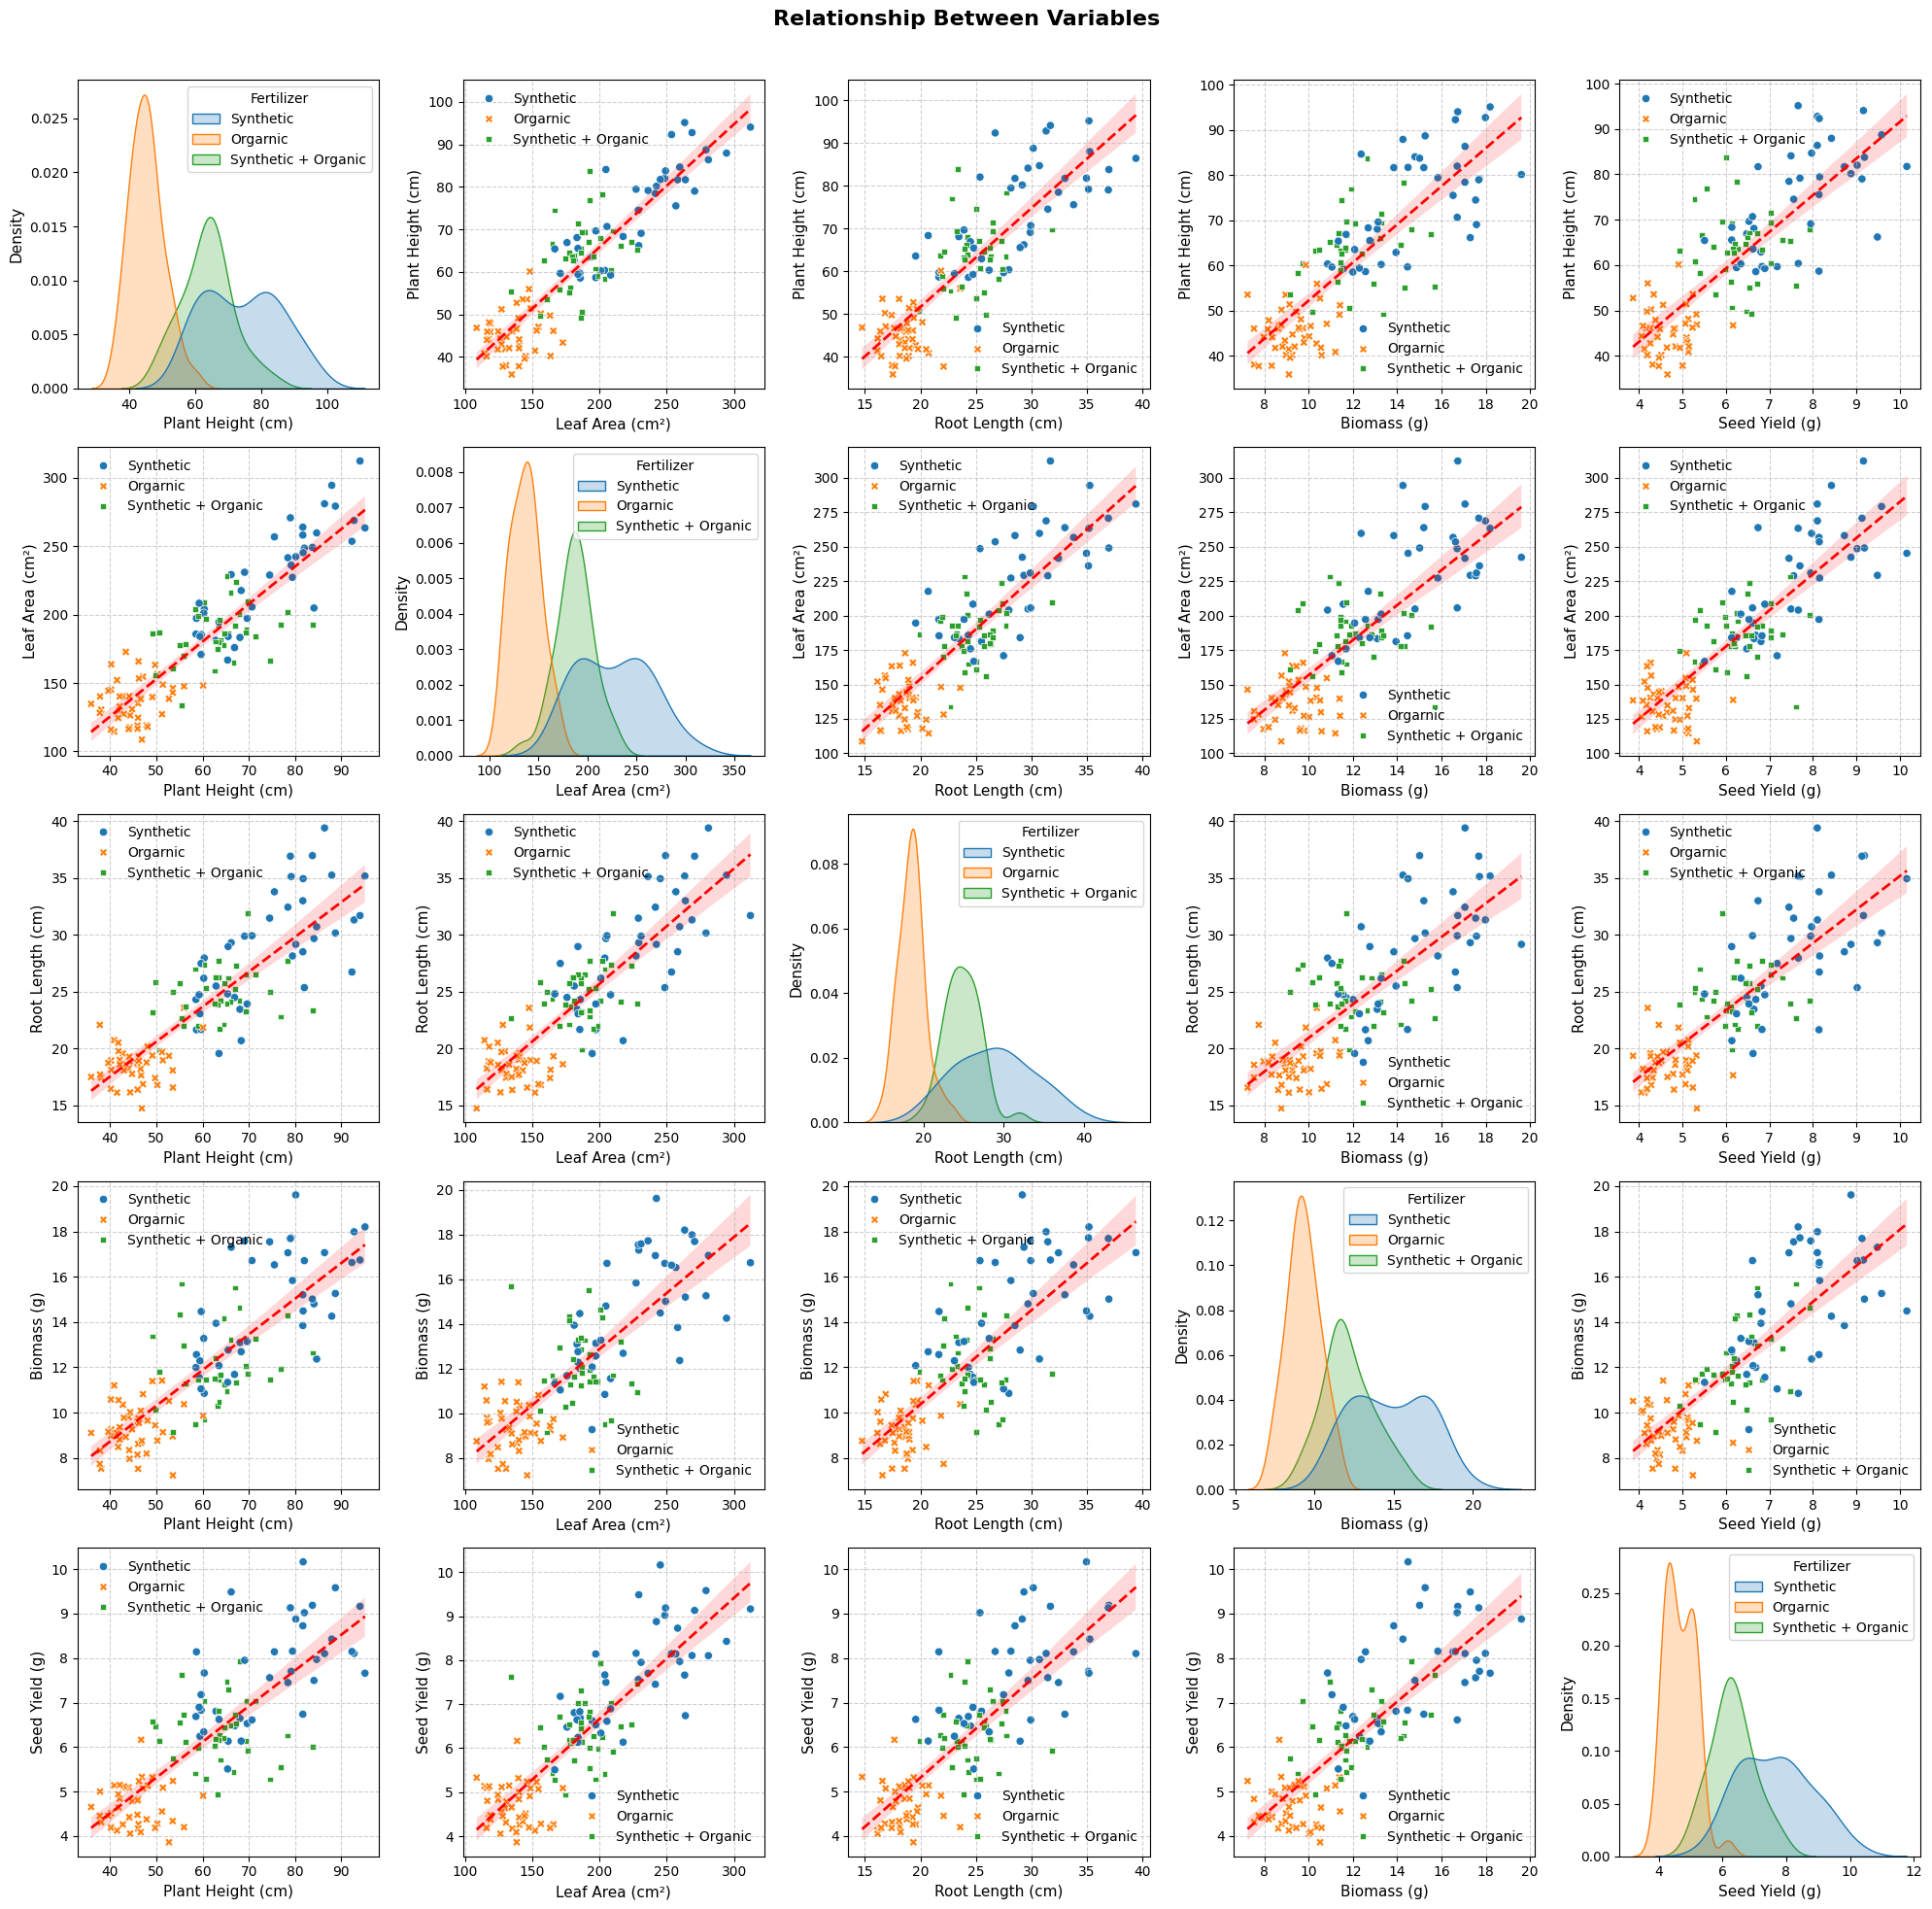

In [14]:
def scatterplot_matrix(data, Variables, group, suptitle=None):
    num_variables = len(Variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    if suptitle: fig.suptitle(suptitle, fontsize=16, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Variables[j]], ax=ax, fill=True, hue=group)
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                sns.scatterplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax, hue=group, style=group, alpha=1)
                sns.regplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel(Variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

group='Fertilizer'
Variables = ['Plant Height (cm)', 'Leaf Area (cm²)',  'Root Length (cm)', 'Biomass (g)', 'Seed Yield (g)']
suptitle = "Relationship Between Variables"
scatterplot_matrix(df, Variables, group, suptitle)

---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

    
<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

<h1 style='font-size: 55px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>